## Analysing a sample of speeches by Modi


Text Analysis is the term describing the very process of computational analysis of texts. while. Text Analytics involves a set of techniques and approaches towards bringing textual content to a point where it is represented as data and then mined for insights/trends/patterns.


Political scientists have applied automated content analysis across a diverse set of texts. ... Exploring large amounts of text data and assigning text to categories is the most common use of text analysis software in political science.





Natural-language processing (NLP) is an area of computer science and artificial intelligence concerned with the interactions between computers and human (natural) languages, in particular how to program computers to fruitfully process large amounts of natural language data (wikipedia).

This rapidly improving area of artificial intelligence covers tasks such as speech recognition, natural-language understanding, and natural language generation.

I am going to be using the Natural Language Toolkit (NLTK) which is a suite of libraries and programs for symbolic and statistical natural language processing for English written in the Python programming language.

The speeches are the speeches of Hon'ble Prime Minister Narendra Damodardas Modi of India. I'm taking a sample of 20 of his speeches. I shall store these in a text document and use that document in the following code. I shall be providing the text file too.

P.S. : The speeches were in Hindi(mostly), translated to English by Google Translate. I don't take any responsibility for any discrepancy created by any of the wrongly translated data.

### Loading necessary libraries

In [ ]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.probability import FreqDist
import matplotlib.pyplot as plt
import numpy as np
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from collections import Counter    
import os
import string
import argparse
import operator

### Frequency polygon

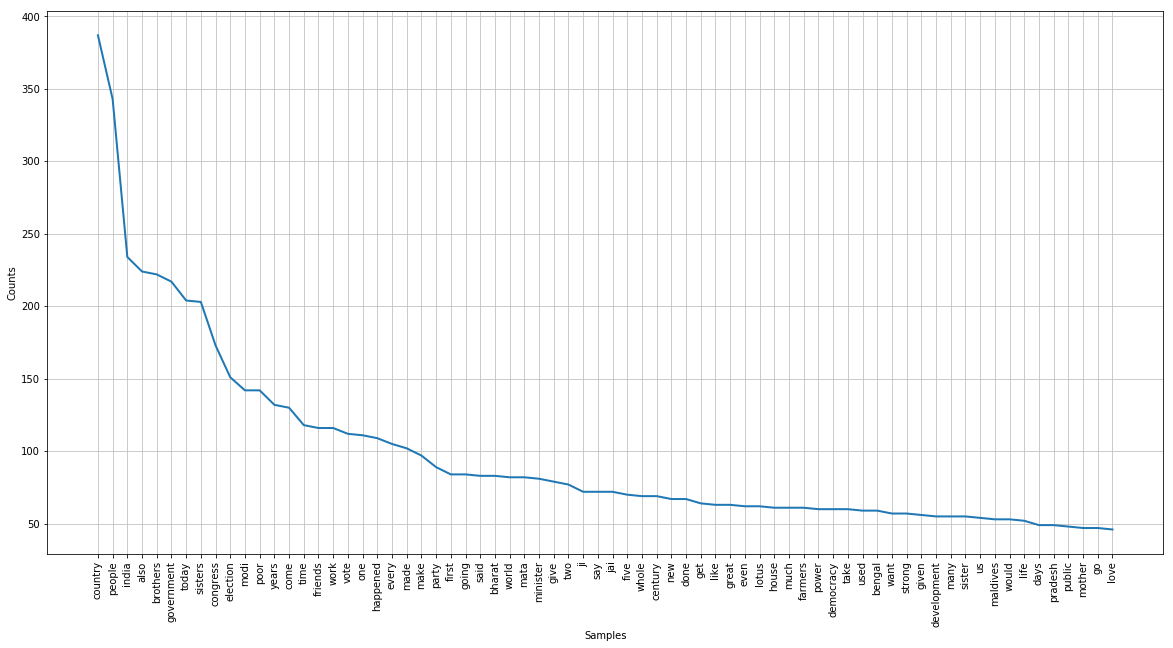

In [2]:
log = open("text.txt", "r")

#print(log.read())

tokenized_word = word_tokenize(log.read().lower())
#print(tokenized_word)
tokenized_word = [w.replace('elections', 'election') for w in tokenized_word]

from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))
items = [',', '.','...','-',':',';','?',"'s"]

l = list(stop_words)

for x in items:
    l.append(x)


filtered_sentence = []
for w in tokenized_word:
    if w not in l:
        filtered_sentence.append(w)
        

#print(filtered_sentence)

fdist = FreqDist(filtered_sentence)
plt.figure(figsize=(20,10))
fdist.plot(70,cumulative=False)
plt.show()

In [3]:
# adding the new data in a new file

data = ' '.join(filtered_sentence)

fout = open('text_new.txt', "a")
fout.write(data)
fout.close()

### Histogram

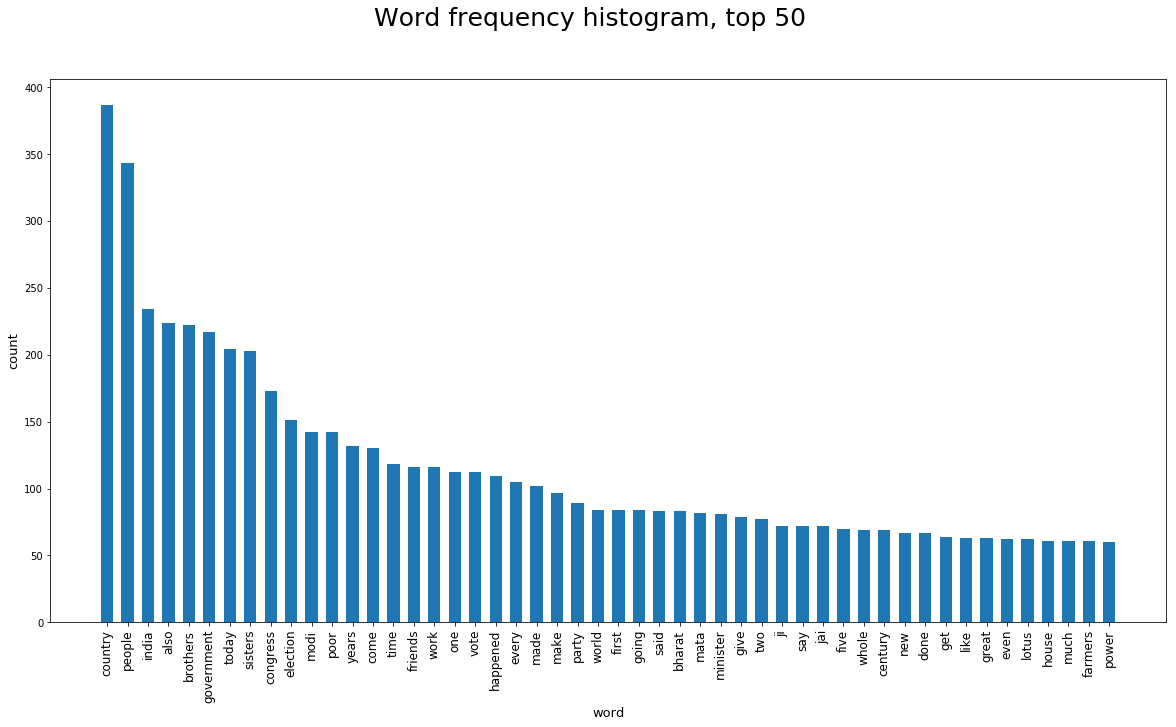

In [4]:
def main():
    
    parser = argparse.ArgumentParser(description=__doc__, formatter_class=argparse.RawDescriptionHelpFormatter)
    parser.add_argument('-f','--filepath',dest='filepath',metavar='file path',help='Path to text input file to be analysed.', required=True)
    parser.add_argument('-n','--number',dest='number',metavar='number',help='Most frequent n words will be displayed and plotted.', required=False, default=50, type=int)
    args = parser.parse_args()
    
    # Path to text file to analyse
    rawfilepath = args.filepath
    
    # Print a histogram containing the top N words, and print them and their counts.
    top_n = args.number
    
    # Load the file
    filepath = os.path.normpath(os.path.join(rawfilepath))
    file = open('text_new.txt')
    
    # Parse as a list, removing lines
    content_sublists = [line.split(',') for line in file.readlines()]
    
    # Parse into a single list (from a list of lists)
    content_list = [item for sublist in content_sublists for item in sublist]
    
    # Remove whitespace so we can concatenate appropriately, and unify case
    content_list_strip = [str.strip().lower() for str in content_list]
    
    # Concatenate strings into a single string
    content_concat = ' '.join(content_list_strip)
    
    # Remove punctuation and new lines
    punct = set(string.punctuation)
    unpunct_content = ''.join(x for x in content_concat if x not in punct)
    
    # Split string into list of strings, again
    word_list = unpunct_content.split()
    
    
    counts_all = Counter(word_list)
    words, count_values = zip(*counts_all.items())
    values_sorted, words_sorted = zip(*sorted(zip(count_values, words), key=operator.itemgetter(0), reverse=True))
    
    # Top N
    words_sorted_top = words_sorted[0:top_n]
    values_sorted_top = values_sorted[0:top_n]
    
    
    # Histogram
    
    # Make xticklabels comprehensible by matplotlib
    xticklabels = str(list(words_sorted_top)).split()
    # Remove the single quotes, commas and enclosing square brackets
    xtlabs = [xstr.replace("'","").replace(",","").replace("]","").replace("[","") for xstr in xticklabels]
    
    indices = np.arange(len(words_sorted_top))
    width = 0.6
    fig = plt.figure(figsize=(20,10))
    fig.suptitle('Word frequency histogram, top {0}'.format(top_n), fontsize=25)
    plt.xlabel('word', fontsize=13)
    plt.ylabel('count', fontsize=13)
    plt.bar(indices, values_sorted_top, width)
    plt.xticks(indices, xtlabs, rotation='vertical', fontsize=12)
    plt.show()
    
if __name__ == '__main__':
    main()
    

### Wordcloud

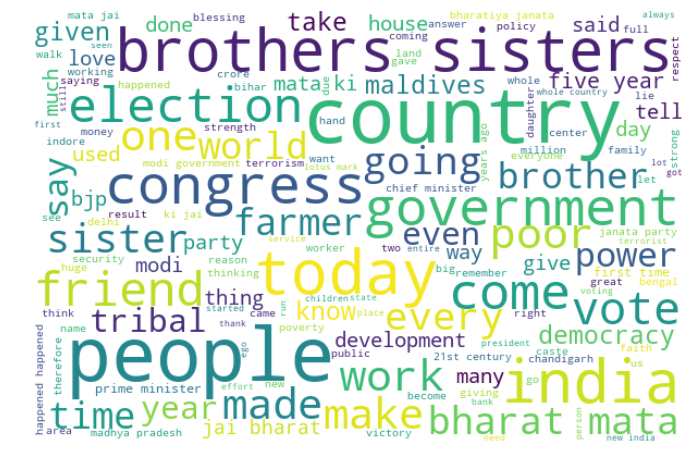

In [5]:
# Generaitng a wordcloud for better understanding and for usage in political analysis:


wordcloud = WordCloud(max_font_size=70, max_words=150, 
                      background_color="white", 
                      width = 600, height=400).generate(' '.join(filtered_sentence))
plt.figure(figsize=(12,8))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

### An exemplary political analysis

Positive, optimistic and neutral words like 'country', 'India', 'today', 'people', 'brothers', 'sisters' help Modi engage better with the masses. Words like 'poor', 'development', 'power', 'vote' show that he knows the problems India is facing and he is keen on those issues. He uses the name of the party 'congress' to reflect the points he considers as wrong of the opponent party rather than using the name of individuals because he doesn't want any name(of an individual) to be brought alongside his. He speaks in the third person more often bringing the term 'modi' so as to instill his name in the minds of the people. He uses 'modi' as much as he uses the name of his party 'bjp'; this reflects that he is aware that his persona will gather him more votes than his party's image will. Also he uses the words like 'work', 'power'. 'democracy' to make the public feel empowered.